<a href="https://colab.research.google.com/github/Anikate-De/TensorFlow-Deep-Learning/blob/main/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification Problems with TensorFlow

## Creating Data to View & Fit

In [55]:
from sklearn.datasets import make_circles

# Create Circles
X, y = make_circles(1000, noise = 0.03, random_state = 4)

In [56]:
X, y[:10]

(array([[-0.63147124,  0.47484734],
        [ 0.45201443,  0.66955349],
        [-0.80337185, -0.15401201],
        ...,
        [ 0.72996545, -0.67413452],
        [-0.55553588,  0.82139889],
        [ 0.05873813,  0.97188803]]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0]))

In [57]:
X.shape, y.shape

((1000, 2), (1000,))

#### Visualise the data

In [58]:
import pandas as pd
circles = pd.DataFrame({"X0" : X[:, 0], "X1" : X[:, 1], "label" : y})
circles

,X0,X1,label
0,-0.631471,0.474847,1
1,0.452014,0.669553,1
2,-0.803372,-0.154012,1
3,-0.676508,-0.414499,1
4,0.817467,0.245586,1
...,...,...,...
995,0.235929,-0.803260,1
996,-0.692623,0.398048,1
997,0.729965,-0.674135,0
998,-0.555536,0.821399,0


##### Visualise with a Plot

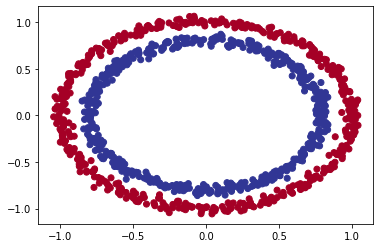

In [59]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

## Steps in Modelling

### Exercise - Creating a Demo Model based on the hyperparameters on [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&regularization=L1&batchSize=5&dataset=circle&regDataset=reg-plane&learningRate=0.003&regularizationRate=0&noise=5&networkShape=7,8,3,7&seed=0.80580&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [60]:
import tensorflow as tf

tf.random.set_seed(4)

# Create a Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation = 'tanh'),
    tf.keras.layers.Dense(8, activation = 'tanh'),
    tf.keras.layers.Dense(3, activation = 'tanh'),
    tf.keras.layers.Dense(7, activation = 'tanh'),
    tf.keras.layers.Dense(1)
])

In [61]:
# Compile the model
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
    loss= "binary_crossentropy",
    metrics = ['binary_crossentropy', 'accuracy']
)

In [62]:
# Fit the model

# Here we'll only use half the dataset to train the model as it gave the best result in TensorFlow Playground
history = model.fit(X[:500], y[:500], epochs = 100, verbose = 0)

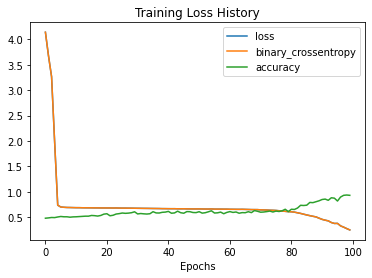

In [63]:
pd.DataFrame(history.history).plot()
plt.title('Training Loss History')
plt.xlabel('Epochs')
plt.legend()

In [64]:
model.evaluate(X[500:], y[500:])

16/16 [==============================] - 0s 5ms/step - loss: 0.2708 - binary_crossentropy: 0.2708 - accuracy: 0.9040


[0.27077528834342957, 0.27077528834342957, 0.9039999842643738]

Now, let's create a model using the conventional ways of Neural Network Classification

In [65]:
# Set Random Seed
tf.random.set_seed(4)

In [66]:
# Create the Model using Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [67]:
# Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['accuracy'])

In [68]:
# Fit the Model
history = model_2.fit(X[:500], y[:500], epochs = 50, verbose = 0) 

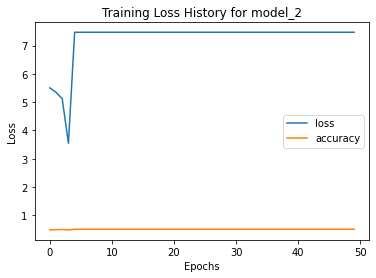

In [69]:
pd.DataFrame(history.history).plot()
plt.title('Training Loss History for model_2')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

## Improving the Model (Failed Attempt)

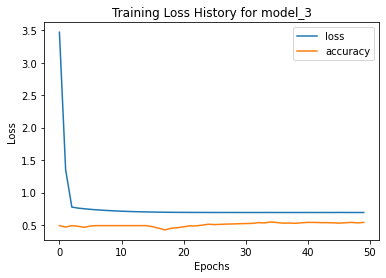

In [70]:
# Set Random Seed
tf.random.set_seed(4)

# Create the Model using Sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

# Fit the Model
history = model_3.fit(X[:500], y[:500], epochs = 50, verbose = 0) 

pd.DataFrame(history.history).plot()
plt.title('Training Loss History for model_3')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [71]:
model_3.evaluate(X[500:], y[500:])

16/16 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.4900


[0.6962358355522156, 0.49000000953674316]

## Understanding the Inaccuracy Problem
We need to figure out why the model is practically `guessing` the classification (since the accuracy is close to 0.5)

To do this, we follow the standard steps, Visualising -

1. The Input Data ✓
2. The Model
3. The Training ✓
4. **The Predictions <----**

Let's create a `plot_boundary()` function that would take in the following arguments

- The Trained Model
- The features (X)
- The labels (y)

It will then create a [**Meshgrid**](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the features

Make predictions across the meshgrid

Plot the predictions and a line between the zones (where each of the class falls)

In [72]:
import numpy as np
def plot_boundary(model, X, y):
  """
  Plots the boundary created by a model's predicting on X
  """

  # Define the axis boundaries of the plot and create a meshgrid

  # We use the margin of 0.1 on both axes
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values for making predictions on
  X_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make Predictions 
  y_pred = model.predict(X_in) 

  # Check for Multi-Class Classification
  if len(y_pred[0]) > 1 : 
    print('Doing Multiclass Classification')
    # We have to reshape the predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)

  plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step


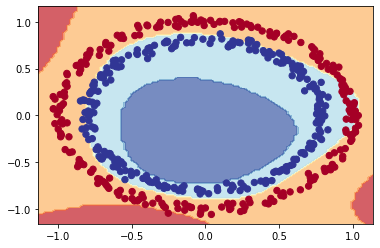

In [73]:
# This is the model from TensorFlow Playground which uses the best hyperparams and a non-linear activation
plot_boundary(model, X[500:], y[500:])

313/313 [==============================] - 1s 3ms/step


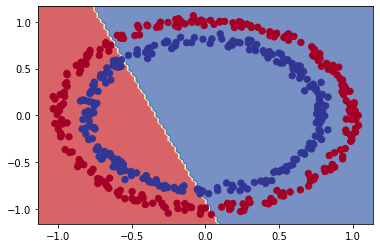

In [74]:
# Check the predictions the model is making
plot_boundary(model_3, X[500:], y[500:])

From the above Contour Map, we see that the model is predicting the classes in a linear manner. This means that our model is still behaving as if it is being used to solve a regression problem. We need to verify this before we begin to solve the problem.

Thus, in the coming few code blocks we are going to implement a regression problem from the available data, and test our model's predictions.

## Checking Model on a Regression Problem

In [75]:
# We created our model for a Binary Classification Problem, but here we're about to use it for a Regression Problem
# Let's change our model to suit a Regression Problem

# Set Random Seed
tf.random.set_seed(4)

# Create the Model using Sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(None, 1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss = tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])

In [76]:
# Create Regression Data for our Model to use

tf.random.set_seed(4)

X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5)

# Our model is basically going to predict the following relation betwwen X_reg and y_reg
# y_reg = X_reg + 100

# Split our data in training and testing datasets
X_reg_train, X_reg_test = X_reg[:160], X_reg[160:]
y_reg_train, y_reg_test = y_reg[:160], y_reg[160:]

# tf.expand_dims(X_reg_train, axis = -1), y_reg_train

# Fit our model to the Regression Datasets
model_3.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs = 100, verbose = 0)

In [77]:
# Make predictions with the "Regression-Trained" model

y_reg_pred = model_3.predict(tf.expand_dims(X_reg_test, axis = -1))

2/2 [==============================] - 0s 7ms/step


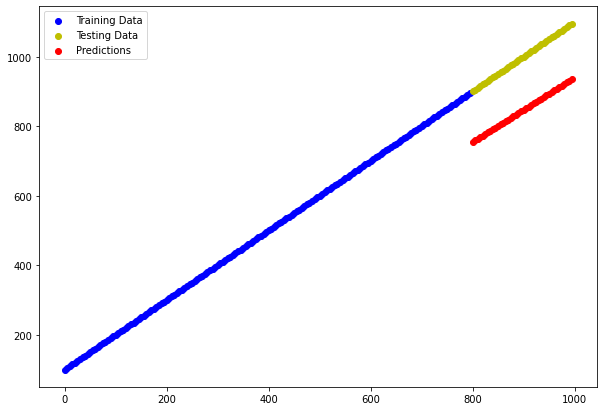

In [78]:
plt.figure(figsize = (10,7))

plt.scatter(X_reg_train, y_reg_train, c = 'b', label = 'Training Data')
plt.scatter(X_reg_test, y_reg_test, c = 'y', label = 'Testing Data')

plt.scatter(X_reg_test, y_reg_pred, c = 'r', label = 'Predictions')

plt.legend()

From the above scatterplot, we notice that the model doesn't behave as poorly as it did for the Binary Classification problem. This means our model is much well suited for a regression model.

This is also hinted by the ways we employed in creating our model, which are very similar to a Regression Problem's Model

To rectify this, we need to figure out the key difference between our classification and regression Datasets.

And that key difference is - **Non Linearity**

## Non-Linearity

Let's try to build our first Neural Network Model with Non-Linearity

In [79]:
# Set Random Seed
tf.random.set_seed(4)

# Create the Model using Sequential API
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu),
])

# Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy'])

# Fit the model
history = model_4.fit(X, y, epochs = 100, verbose = 0)

model_4.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 4.4825 - accuracy: 0.4750


[4.48252534866333, 0.4749999940395355]

Since the model still performs poorly, we are going to try and improve our "non-linear" model

In [80]:
# Set Random Seed
tf.random.set_seed(4)

# Create the Model using Sequential API
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy'])

# Fit the model
history = model_5.fit(X, y, epochs = 250, verbose = 0)

model_5.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9960


[0.02273285761475563, 0.9959999918937683]

313/313 [==============================] - 1s 2ms/step


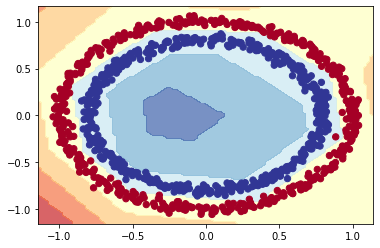

In [81]:
plot_boundary(model_5, X, y)

It looks like the model is slowly able to figure out that the red dots are on the outside, but it is still performing poorly.

We can now try our final trick, that is, adding a non-linear activation function to the output layer.

In [82]:
# Set Random Seed
tf.random.set_seed(4)

# Create the Model using Sequential API
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03),
              metrics = ['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs = 100, verbose = 0)

model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9990


[0.004805860109627247, 0.9990000128746033]

313/313 [==============================] - 1s 2ms/step


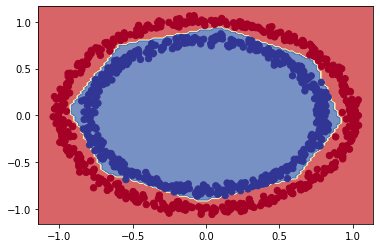

In [83]:
plot_boundary(model_6, X, y)

## Visualising Activation Functions

Let's start by creating a toy tensor for us to test and visualise our activation functions on -

In [84]:
A = tf.range(-10, 10, dtype = tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

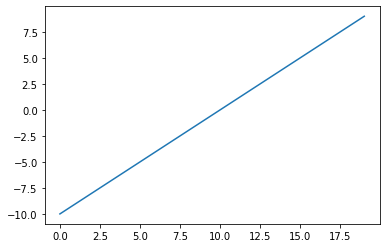

In [85]:
# Visualize our toy tensor
plt.plot(A)

### Sigmoid

*sigmoid(x) = 1 / (1 + exp(-x))*

In [86]:
# Create a function that returns the sigmoid of `x`
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [87]:
# Generate the sigmoid of our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

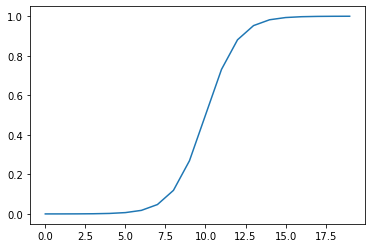

In [88]:
plt.plot(sigmoid(A))

### ReLU (Rectified Linear Unit)

*relu(x) = max(0, x)*

Which practically translates to - 

relu(x) = **0** *for all x* <= 0; **x** *for all x* > 0

In [89]:
def relu(x):
  return tf.maximum(0, x)

In [90]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

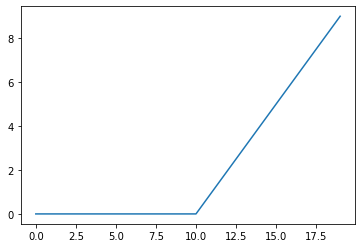

In [91]:
plt.plot(relu(A))

### Linear

linear(x) = x

The input remains unmodified

In [92]:
def linear(x):
  return x

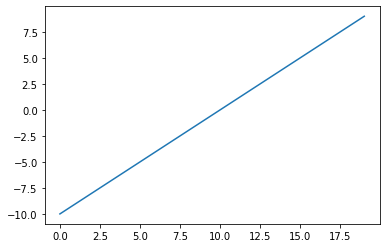

In [93]:
plt.plot(linear(A))

### Tanh

*tanh(x) = sinh(x)/cosh(x) = ((exp(x) - exp(-x))/(exp(x) + exp(-x)))*

In [94]:
def tanh(x):
  return (tf.exp(x) - tf.exp(-x))/(tf.exp(x) + tf.exp(-x))

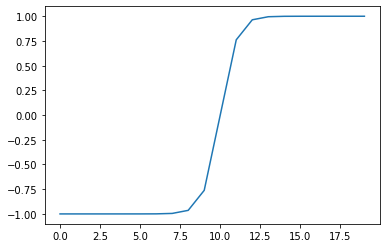

In [95]:
plt.plot(tanh(A))

## Using Training and Testing Datasets

In [96]:
len(X), len(y)

(1000, 1000)

In [97]:
X_train, X_test = X[:600], X[600:]
y_train, y_test = y[:600], y[600:]

len(X_train), len(X_test)

(600, 400)

In [98]:
# Here we finalise our model and train it specifically on the training datasets

# Set Random Seed
tf.random.set_seed(4)

# Create the Model using Sequential API
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03),
              metrics = ['accuracy'])

# Fit the model
history = model_7.fit(X_train, y_train, epochs = 100, verbose = 0)

model_7.evaluate(X_test, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.0707 - accuracy: 0.9750


[0.07071342319250107, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step


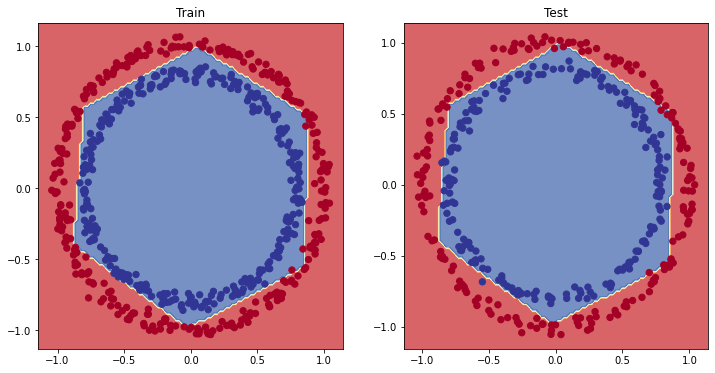

In [99]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")

plot_boundary(model_7, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Test')
plot_boundary(model_7, X_test, y_test)

plt.show()

In [100]:
model_7.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 4)                 12        
                                                                 
 dense_45 (Dense)            (None, 4)                 20        
                                                                 
 dense_46 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Finding the Best Learning Rate

In [101]:
# Convert the history object into a DataFrame

pd.DataFrame(history.history)

,loss,accuracy
0,0.700484,0.481667
1,0.694069,0.468333
2,0.693821,0.468333
3,0.694019,0.500000
4,0.695653,0.445000
...,...,...
95,0.040651,0.985000
96,0.026208,0.993333
97,0.028749,0.995000
98,0.023854,0.995000


From the above `DataFrame`, we can easily visualise that the loss reduces to ~0.002 and the accuracy of the model reaches 1 over time.

Text(0.5, 1.0, 'Loss Curve')

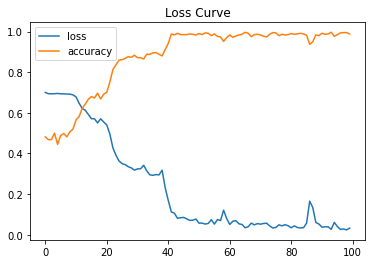

In [102]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Loss Curve')

To Find the Best Learning Rate (the learning rate where the loss decreases steeply), we follow these steps -

* A learning rate **callback** - a callback can be added to a model while it is training.
* Initialise another model with the said callback
* A modified loss curve plot

In [109]:
# Set Random Seed
tf.random.set_seed(4)

# Create the Model using Sequential API
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03),
              metrics = ['accuracy'])

# Create a callback to utilize the learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10 ** (epoch / 20))


# Fit the model
history = model_8.fit(X_train,
                      y_train,
                      epochs = 100,
                      verbose = 0,
                      callbacks = [lr_scheduler])

model_8.evaluate(X_test, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 17.4237 - accuracy: 0.5025


[17.423738479614258, 0.5024999976158142]

<AxesSubplot:xlabel='Epochs'>

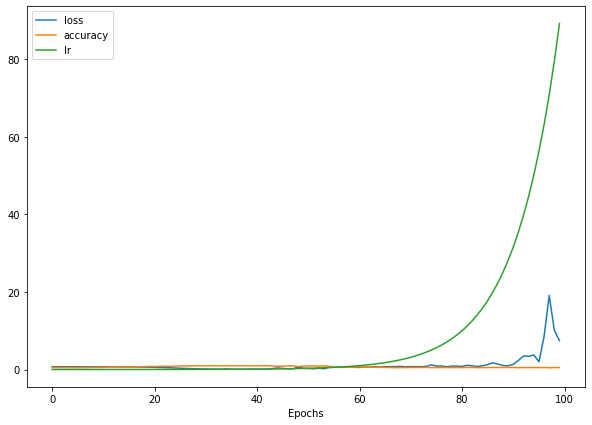

In [110]:
pd.DataFrame(history.history).plot(figsize = (10, 7), xlabel = 'Epochs')

Now plot the learning rate vs loss

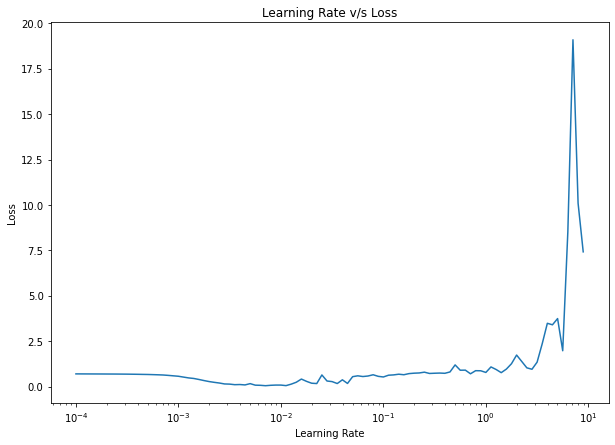

In [111]:
lrs = 1e-4 * (10 ** (tf.range(100) / 20))
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate v/s Loss')
plt.show()

From the above plot, the best learning rate would be at the point where the loss is the least.

We find out the loss is indeed the least in between *0.01* to *0.001*

Luckily enough, we put the `learning_rate` at 0.03 at the beginning, which justifies our model's low loss and high accuracy

In [112]:
# Set Random Seed
tf.random.set_seed(4)

# Create the Model using Sequential API
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03),
              metrics = ['accuracy'])


# Fit the model
history = model_9.fit(X_train,
                      y_train,
                      epochs = 100,
                      verbose = 0)

model_9.evaluate(X_test, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9850


[0.048955775797367096, 0.9850000143051147]

## Evaluation Metrics

In a Classification Problem

In a classification problem, the following metrics are used - 

* [Accuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) - It is the default metric for classification problems, but it is not the best for imbalanced classes in Multi-Class Classification

* [Precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision) - Higher Precision leads to lower false positives

* [Recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall) - Higher Recall leads to lower false negatives.
In a classification problem, both the Precision and the Recall cannot be high at the same time. It is only possible to keep one of them high.

* [F-1 Score](https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/F1Score) - It is a combination of Precision & Recall, and usually a good metric for a classification model

* [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) - Compares Prediction to Truth Labels, and sees where the model gets confused. Can be a little hard to utilize and understand when dealing with a large number of classes

* [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - A textual represention of all popularly used evaluation metrics

In [113]:
# Calculate the model's loss and accuracy
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f'Model Loss on the Test Dataset is {loss}')
print(f'Model Accuracy on the Test Dataset is {(accuracy*100):.2f}%')

13/13 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9850
Model Loss on the Test Dataset is 0.048955775797367096
Model Accuracy on the Test Dataset is 98.50%


### Make a Confusion Matrix

The following terms are necessary to understand a confusion matrix - 
* True Positive - Predicts 1 when Truth is 1
* True Negative - Predicts 0 when Truth is 0
* False Positive - Predicts 1 when Truth is 0
* False Negative - Predicts 0 when Truth is 1

The structure of a confusion matrix is - 

|||
|:---:|:---:|
| True Positive | False Positive |
| False Negative | True Negative |

In [143]:
# Display the confusion Matrix
from sklearn.metrics import confusion_matrix

# First we need to change our predictions to binary
y_pred = model_9.predict(X_test)

confusion_matrix(y_test, tf.round(y_pred))

13/13 [==============================] - 0s 4ms/step


array([[195,   4],
       [  2, 199]])

#### Prettify our Confusion Matrix

In [144]:
import itertools
import tensorflow as tf

def plot_confusion_matrix(y_true, y_pred, normalize = True):
  """
  Plots a Confusion Matrix based on the Ground Truth and the predicted values.

  If `normalize` is set to True, the predicted values are rounded off to corresspond to singular class values
  """

  if normalize:
    y_pred = tf.round(y_pred)

  figsize = (10, 10)

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # Normalize our Confusion Matrix

  n_classes = cm.shape[0]

  # Now, let's prettify the plotting
  fig, ax = plt.subplots(figsize = figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)

  # Show the Colorbar alongside
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = 'Confusion Matrix',
        xlabel = 'Predicted Label',
        ylabel = 'True Label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels
        )

  # Set Label Positions
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust Label Size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)

  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j] * 100 : .1f}%)',
            horizontalalignment = 'center',
            color = 'white' if cm[i, j] > threshold else 'black',
            size = 15)

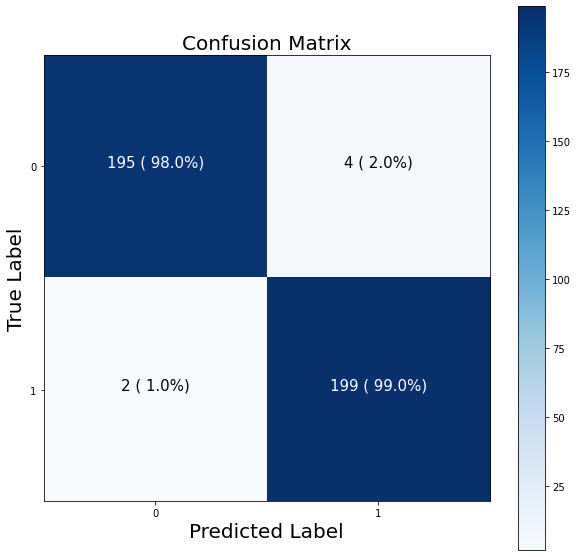

In [145]:
plot_confusion_matrix(y_test, y_pred)
